<a href="https://colab.research.google.com/github/chinmayithumma/MLTasks/blob/main/task_1_decision_trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sample Data:
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

✅ Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Confusion Mat

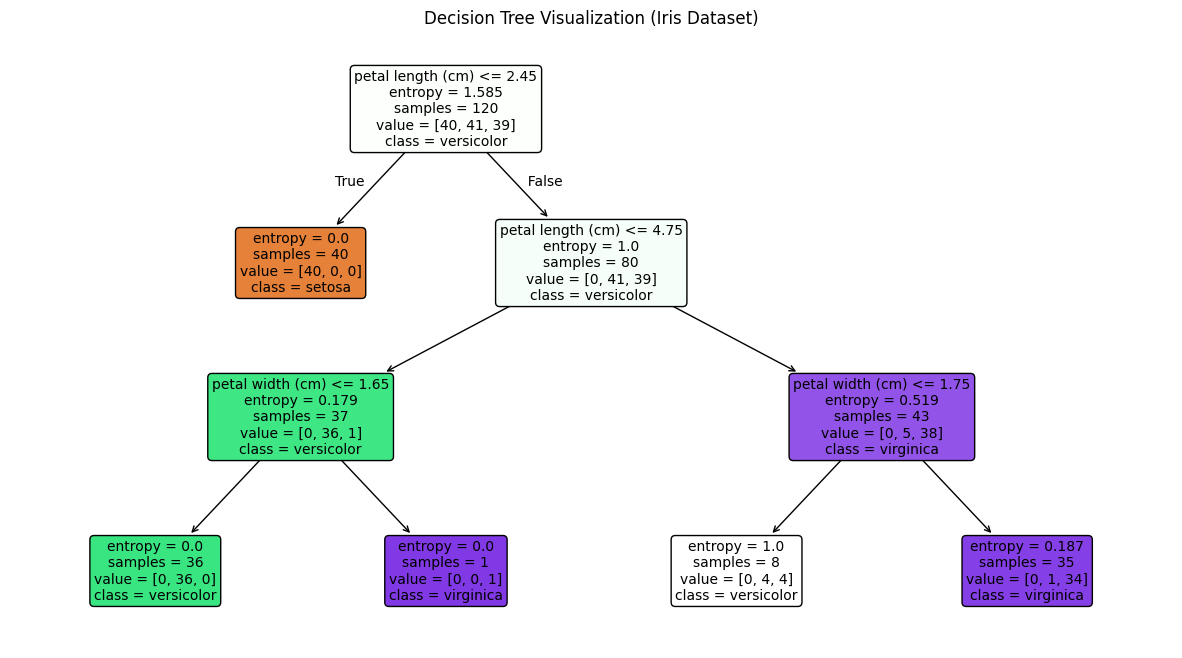


Feature Importance:
 petal length (cm)    0.918114
petal width (cm)     0.081886
sepal width (cm)     0.000000
sepal length (cm)    0.000000
dtype: float64


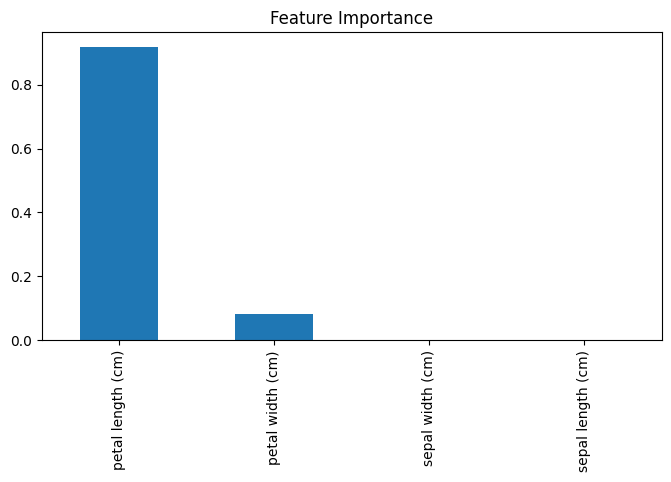

In [1]:
# Dataset: Iris (built-in from sklearn)
# Deliverable: model training, visualization, and evaluation

# 1️⃣ Import packages
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

# 2️⃣ Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = [target_names[i] for i in y]
print("Sample Data:\n", df.head())

# 3️⃣ Split data into train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4️⃣ Build Decision Tree model
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

# 5️⃣ Predict & evaluate
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"\n✅ Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 6️⃣ Visualize the Decision Tree
plt.figure(figsize=(15,8))
plot_tree(clf,
          filled=True,
          feature_names=feature_names,
          class_names=target_names,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization (Iris Dataset)")
plt.show()

# 7️⃣ Show feature importance
importances = pd.Series(clf.feature_importances_, index=feature_names).sort_values(ascending=False)
print("\nFeature Importance:\n", importances)
importances.plot(kind='bar', figsize=(8,4), title='Feature Importance')
plt.show()
